In [105]:
# plt 中文字体
import matplotlib as mpl
import matplotlib.pyplot as plt

CHINESE_FONT = 'Microsoft YaHei'   # 或者改成 'SimHei'

# ① 把它加入默认的 sans‑serif 字体族
mpl.rcParams['font.sans-serif'] = [CHINESE_FONT]   # 只改 sans-serif 系列
mpl.rcParams['font.family']      = 'sans-serif'    # 统一使用 sans-serif

# ② 关闭负号的 Unicode 处理（负号会显示成方框）
mpl.rcParams['axes.unicode_minus'] = False

In [106]:
import matplotlib
print(matplotlib.get_configdir())

C:\Users\DBC\.matplotlib


# 图表种类
seaborn; matplotlib

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

sns.set_palette('pastel') # 设置色盘

## 单个变量
- 直方图
- 密度
- 箱型图
- 小提琴图

<details>
<summary>Boxplot</summary>  

![boxplot.png](./images/boxplot.png)
</details>
  
<details>
<summary>小提琴图 说明</summary>  

![boxplot.png](./images/violinplot.png)
</details>



In [108]:
# setup
values = np.random.normal(loc=50, scale=15, size=1000,)
s1 = pd.Series(values, name='分数')
s1

0      52.530137
1      55.948496
2      54.364039
3      35.272833
4      55.190766
         ...    
995    34.466476
996    68.351023
997    37.031740
998    57.080307
999    31.585621
Name: 分数, Length: 1000, dtype: float64

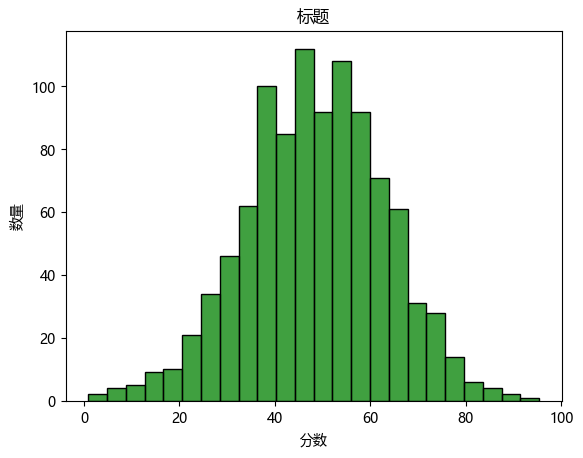

In [109]:
# 直方图 histogram
sns.histplot(s1, color="green")  # 传入df: sns.histplot(df, x="列名"); 设置颜色
plt.title("标题")
plt.xlabel("分数")
plt.ylabel("数量")
plt.show() # 非jypyter 运行时需要

<Axes: xlabel='分数', ylabel='Density'>

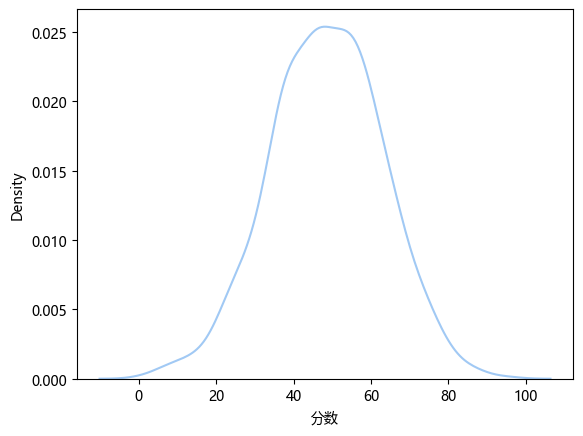

In [110]:
# 密度图 kernel density
sns.kdeplot(s1)

<Axes: >

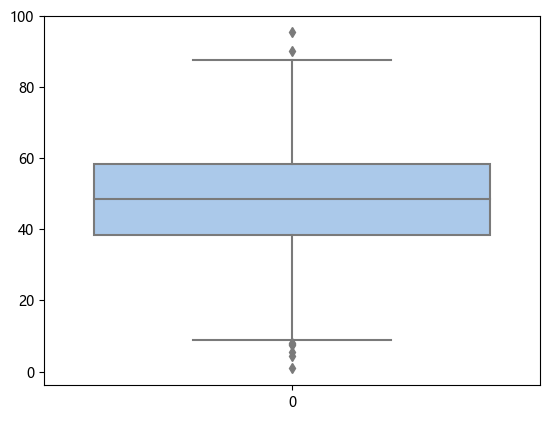

In [111]:
# 箱型图 box
sns.boxplot(s1) # 传入series时

# 传入df
# sns.boxplot(df, y='列名')

<Axes: >

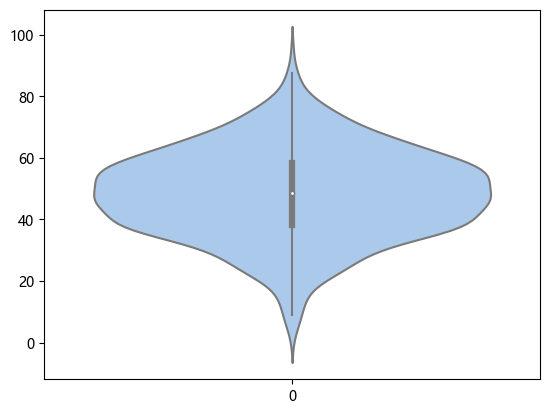

In [112]:
# 小提琴图 violin plot
sns.violinplot(s1)

## 两个变量
- 散点图 scatter plot
- 折线图 line plot
- 条形图 bar ploy
    - 计数图
- 饼图 pieplot
- 

### 散点图

In [113]:
# setup
tips_df = pd.read_csv('./files/tips.csv')

<Axes: xlabel='total_bill', ylabel='tip'>

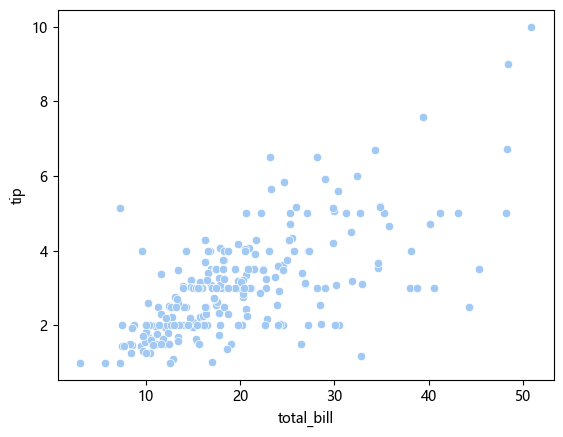

In [114]:
sns.scatterplot(tips_df, x='total_bill', y= 'tip') # 颜色
# or : sns.scatterplot(x=tips_df['total_bill'], y=tips_df['tip'])

### 折线图

<Axes: xlabel='year', ylabel='passengers'>

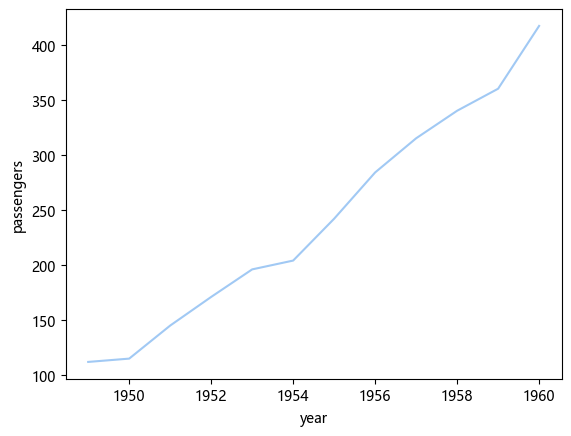

In [115]:
df2 = pd.read_csv('./files/flights.csv').query('month == "January"')
sns.lineplot(df2, x='year', y='passengers')

### 条形图

<Axes: xlabel='island', ylabel='count'>

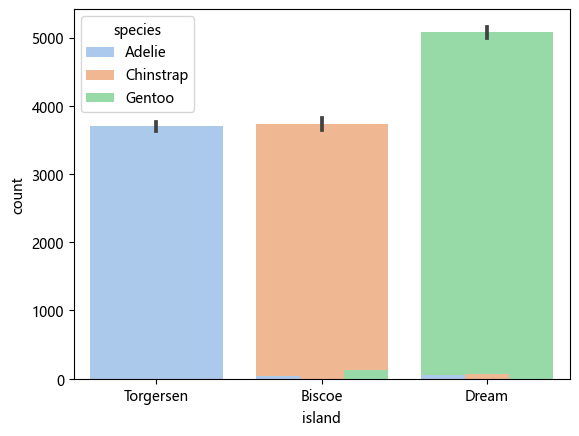

In [ ]:
df3 = pd.read_csv('./files/penguins.csv')
sns.barplot(df3, x='species', y='body_mass_g', estimator=np.mean) # estimator默认为平均值


### 计数图

In [ ]:
sns.countplot(df3, x='island', hue='species') # 计数图

In [117]:
df3

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### pie plot

In [118]:
# setup
fruit = pd.Series(['apple', 'orange', 'banana', 'pear'])
vote = pd.Series([32, 22, 19, 7])
df4 = pd.DataFrame({'fruit':fruit, 'vote':vote})
df4

,fruit,vote
0,apple,32
1,orange,22
2,banana,19
3,pear,7


([<matplotlib.patches.Wedge at 0x18c37fc5600>,
 [Text(0.33991867422268784, 1.0461621742897658, 'apple'),
  Text(-1.0696068980119993, -0.2567899603277911, 'orange'),
  Text(0.29858456423748386, -1.0587007405301614, 'banana'),
  Text(1.0587007754745346, -0.2985844403340863, 'pear')],
 [Text(0.1854101859396479, 0.5706339132489631, '40.0%'),
  Text(-0.5834219443701814, -0.14006725108788606, '27.5%'),
  Text(0.16286430776590027, -0.5774731311982698, '23.7%'),
  Text(0.5774731502588369, -0.16286424018222886, '8.7%')])

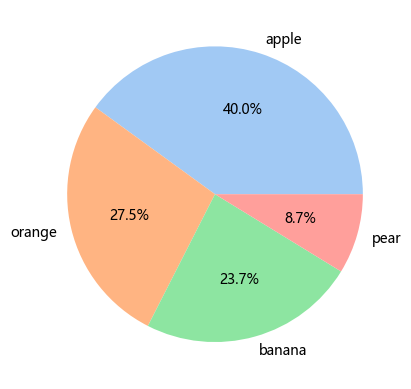

In [119]:
'''
autopct='%.1f%%'
% : 文字格式以此开头
.1f : 一位浮点数
%% : 以%结尾 (两个% 与 开头一个%作为区分)

PS：如果不提供 autopct，饼图只会显示标签（labels=）或颜色图例，不会出现数值
'''
plt.pie(df4['vote'], labels=df4['fruit'], autopct='%.1f%%') # 传入df的列

# 传入s 
# plt.pie(series) index为label, 值为数量
# plt.pie(species, autopct='%.0f%%', labels=species.index) # 添加标签

## 多个变量

In [120]:
# setup
iris_df = pd.read_csv('./files/iris.csv')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 散点图

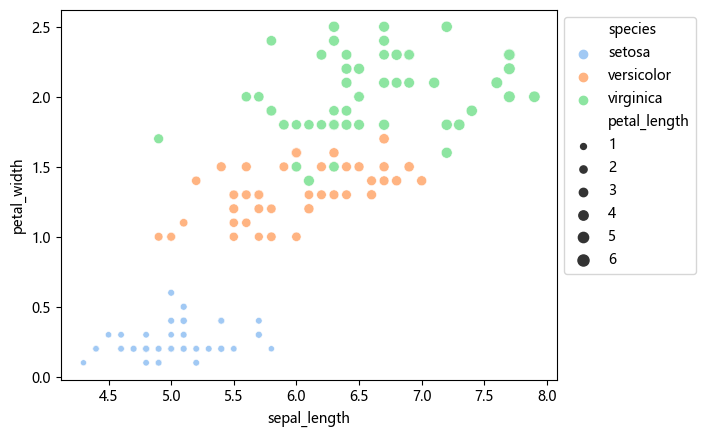

In [121]:
# hue : 把类型表示为不同颜色变量
# size : 改变点的大小以表示第四个变量
sns.scatterplot(iris_df, x='sepal_length', y='petal_width', hue='species', size='petal_length')
plt.legend(bbox_to_anchor=(1,1)) # 调整图例位置, 可设置为 (0/1 : 横向, 0/1) 4种


### 折线图

In [122]:
# setup
df2 = pd.read_csv('./files/flights.csv')

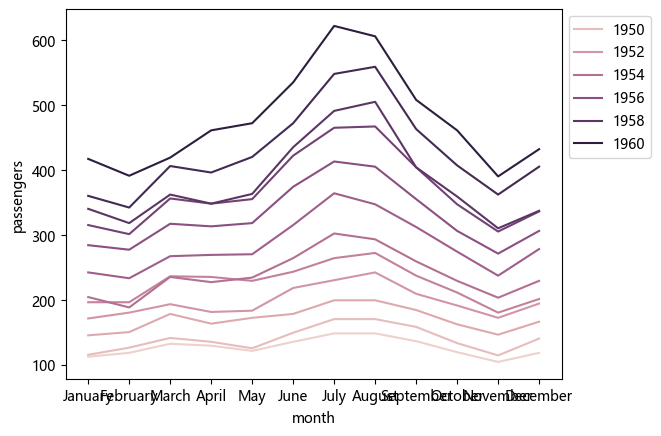

In [123]:
sns.lineplot(df2, x='month', y='passengers', hue='year') # 不能调整size
plt.legend(bbox_to_anchor=(1,1))

### 条形图

In [124]:
df3

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


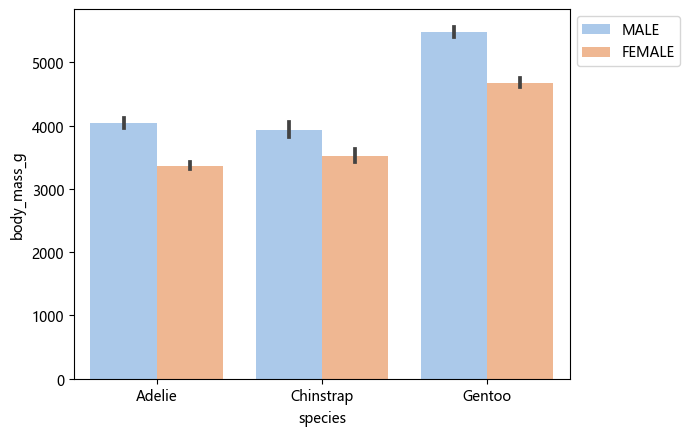

In [125]:
sns.barplot(df3, x='species', y='body_mass_g', hue='sex')
plt.legend(bbox_to_anchor=(1,1))

### 热力图 heatmap

In [126]:
# setup
glue_df = pd.read_csv('./files/glue.csv')
glue_pivot = glue_df.pivot_table(index='Model', columns='Task', values='Score')

In [127]:
glue_pivot

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


<Axes: xlabel='Task', ylabel='Model'>

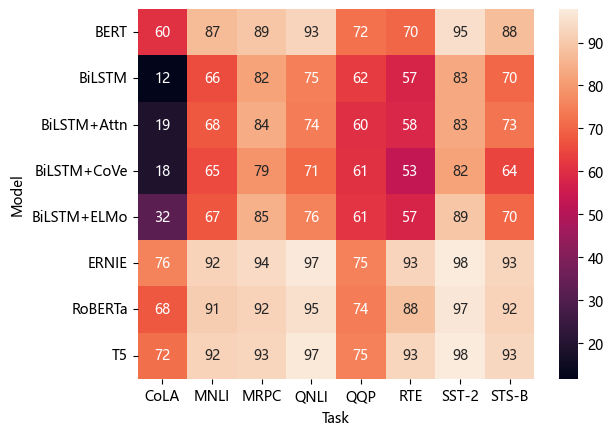

In [128]:
sns.heatmap(glue_pivot, annot=True) # annot: annotation

## 一个图表示多个变量


In [129]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [130]:
setosa = iris_df.query('species == "setosa"')
versicolor = iris_df.query('species == "versicolor"')
virginica = iris_df.query('species == "virginica"')

### 直方图

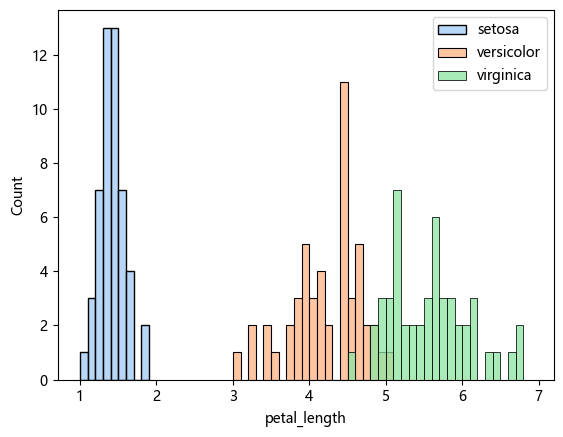

In [131]:
# 直方图
sns.histplot(setosa['petal_length'], binwidth=0.1, label='setosa')
sns.histplot(versicolor['petal_length'], binwidth=0.1, label='versicolor')
sns.histplot(virginica['petal_length'], binwidth=0.1, label='virginica')
plt.legend() # 显示标签


### 密度图

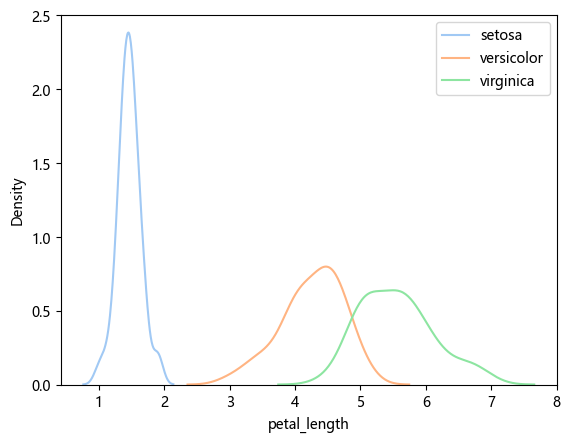

In [132]:
sns.kdeplot(setosa['petal_length'], label='setosa')
sns.kdeplot(versicolor['petal_length'], label='versicolor')
sns.kdeplot(virginica['petal_length'], label='virginica')
plt.legend() # 显示标签

### boxplot

<Axes: ylabel='petal_length'>

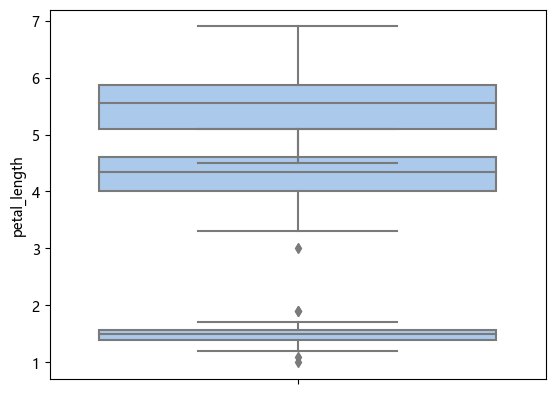

In [133]:
# boxplot
sns.boxplot(setosa, y='petal_length')
sns.boxplot(versicolor, y='petal_length')
sns.boxplot(virginica, y='petal_length')

<Axes: xlabel='species', ylabel='petal_length'>

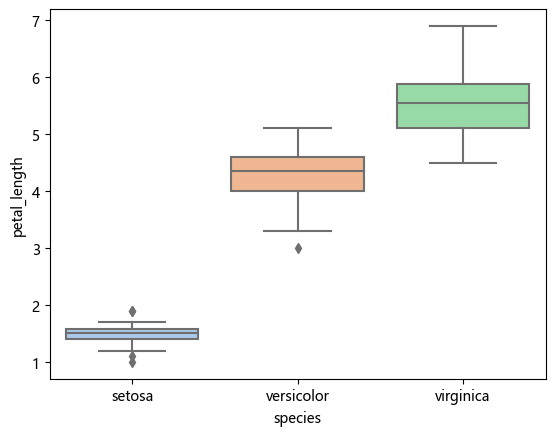

In [134]:
sns.boxplot(iris_df, y='petal_length', x='species')

### violinplot

<Axes: ylabel='petal_length'>

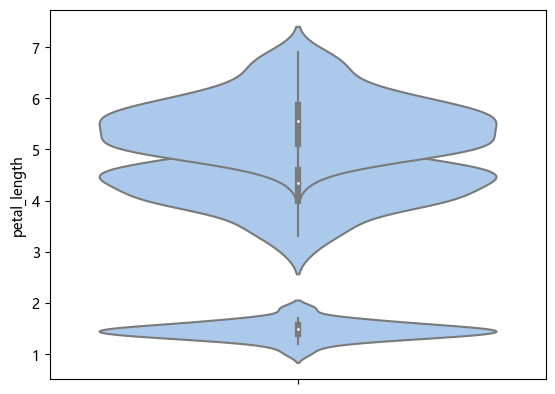

In [135]:
sns.violinplot(setosa, y='petal_length')
sns.violinplot(versicolor, y='petal_length')
sns.violinplot(virginica, y='petal_length')

<Axes: xlabel='species', ylabel='petal_length'>

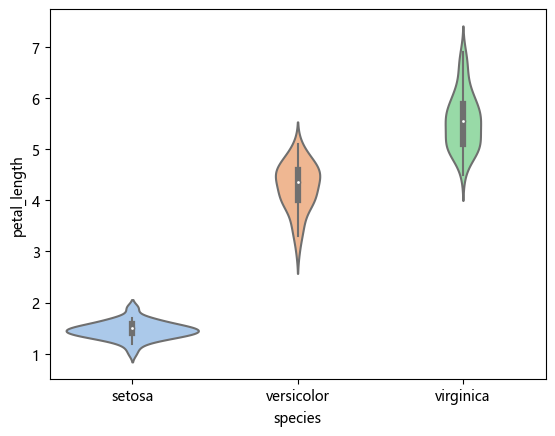

In [136]:
sns.violinplot(iris_df, y='petal_length', x='species')

## 多个图并排放在一起

<Axes: xlabel='species', ylabel='petal_width'>

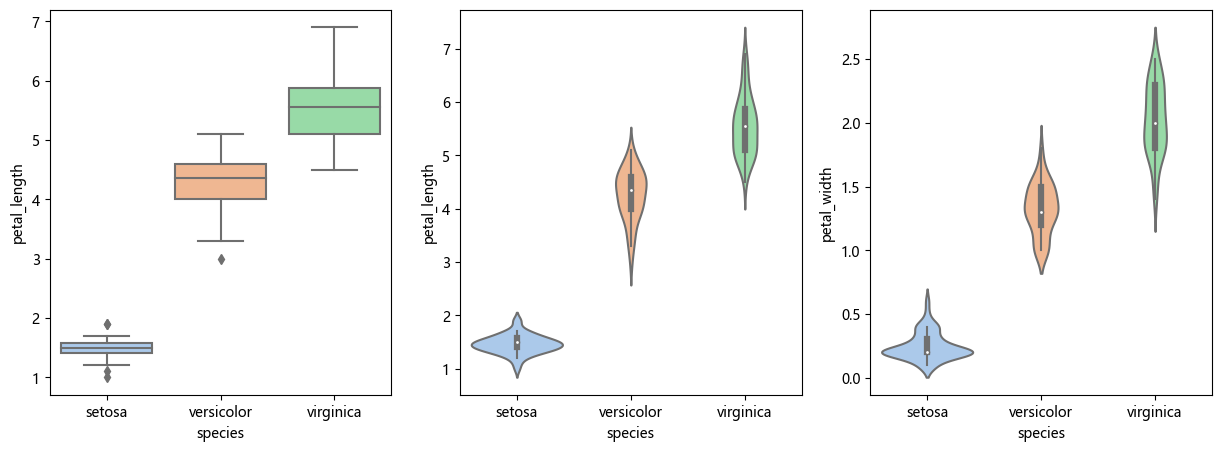

In [137]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) # 1 行, 3列; figsize: 大小
sns.boxplot(iris_df, y='petal_length', x='species', ax=axes[0]) 
sns.violinplot(iris_df, y='petal_length', x='species', ax=axes[1])
sns.violinplot(iris_df, y='petal_width', x='species', ax=axes[2])

In [138]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


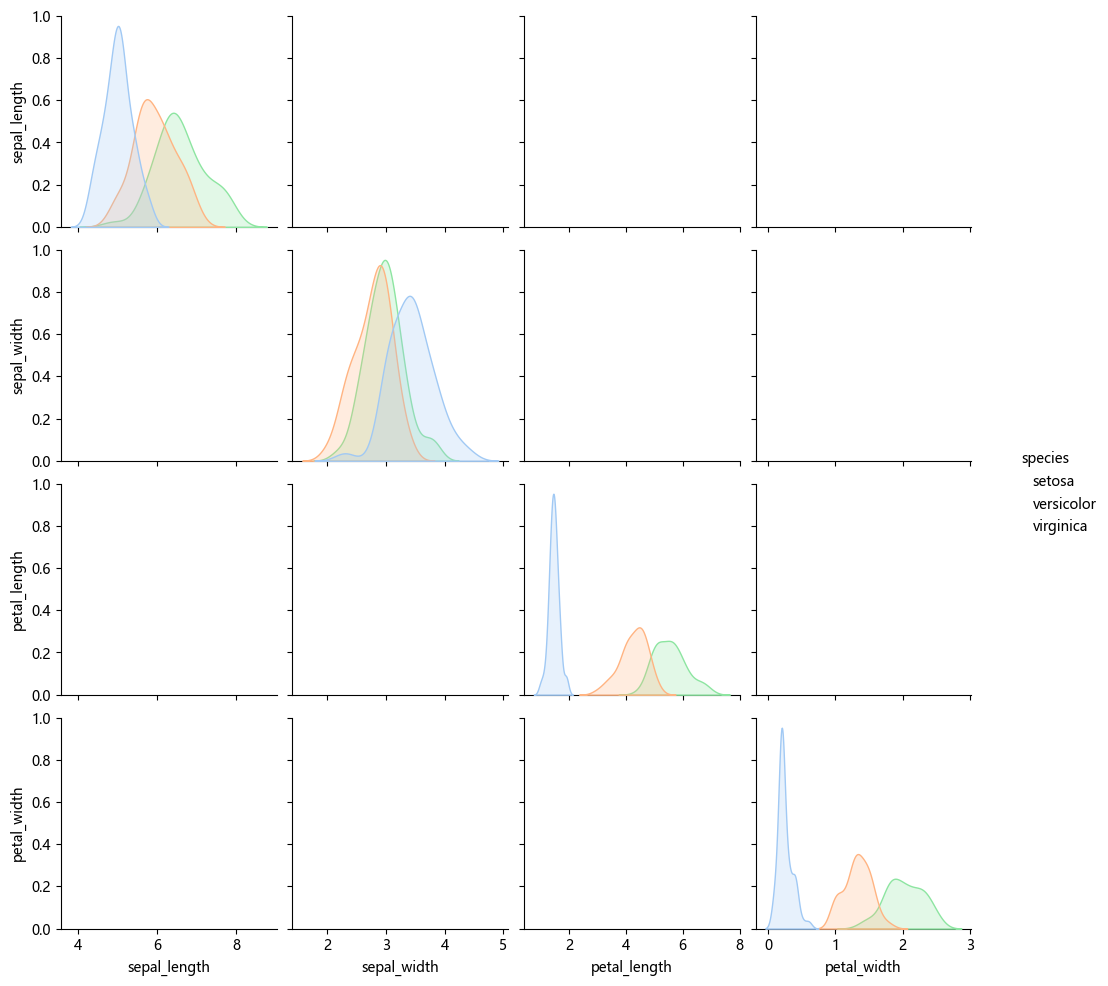

In [146]:
# 线性回归
# 'scatter_kws':{'alpha': 0.3}} : '散点图':{'透明度': 1代表完全不透明}} 
sns.pairplot(iris_df,
             hue="species", 
             kind='ref',
            plot_kws={'scatter_kws': {'alpha': 0.3}} ) # n个变量两两绘图, hue: 
plt.show()